309653002 林暐軒

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Plot out $\psi_n (x)$ for 𝑛= 1,2,3,4,5… of the infinite quantum well of width 𝑤=10nm 


In [2]:
def psi(x,n,width):
    # x is the position point ; n is state 
    y=np.zeros(len(x))
    for i in range(len(y)):
        if x[i]>0 and w>x[i]:
            y[i]=np.sqrt(2/(width))*np.sin(n*np.pi*(x[i]/(width)))
    return y

In [3]:
def plot_PSI(x,n,width):
    # draw the psi with different state
    # x is the position point ; n is state 
    PSI=[]
    for i in range(n):
        y=psi(x,i+1,width)
        PSI.append(y)
    for k in range(n):
        plt.plot(x,PSI[k])
        plt.xlabel('x(nm)')
        plt.ylabel('$\psi(x)$')
    return PSI

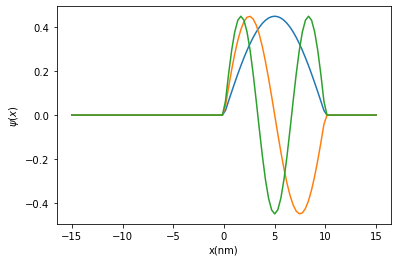

In [4]:
n=3
w=10
x=np.linspace(-15,15,100)
PSI=plot_PSI(x,n,w)

2. Find the optical matrix elements $V_{n^{'},n}$ of the transition  from the lowest bound state $\psi_{n=1}$ to the excited state $\psi_{n^{'}}$ for $ 𝑛^{'}=2,3,4,5…$ under the resonant light with $\omega=(E_{n^{′}}−E_n)/(h/2\pi) $ using the Simpson rule for integration.

In [5]:
def simpson_integral(a,b,n,f):
    h=(b-a)/(2*n)
    x=np.linspace(a,b,2*n+1)
    y=f(x)
    s=0
    for i in range(n):
        s=s+y[2*i]+4*y[2*i+1]+y[2*i+2]
    return s*(h/3)

In [6]:
def psi_x_psi(x,n_ini,n_fin,width):
    #the function : psi_n' * x * psi_n
    return psi(x,n_fin,width)*x*psi(x,n_ini,width)

In [7]:
def simpson_integral_for_V(a,b,n,n_ini,n_fin,width):
    # base on simpson rule to approxamte the integral Vn'n=eE0 \int dx psi_n' * x * psi_n
    h=(b-a)/(2*n)
    x=np.linspace(a,b,2*n+1)
    y=psi_x_psi(x,n_ini,n_fin,width)
    s=0
    for i in range(n):
        s=s+y[2*i]+4*y[2*i+1]+y[2*i+2]
    return s*(h/3)

In [8]:
def print_matrix_element(a,b,n,n_ini,width,eE0,m):
    V=[]
    for n_state in range(1,m+1):
        n_fin=n_state
        V.append(simpson_integral_for_V(a,b,n,n_ini,n_fin,width))
        print('When n_fin=',n_fin,' the matix element V is', V[-1])
        
    return np.array(V)

In [9]:
w=10
[a,b]=[0,10]
n=100
eE0=1
n_ini=1
m=20
V=print_matrix_element(a,b,n,n_ini,w,eE0,m)

When n_fin= 1  the matix element V is 4.999999999999997
When n_fin= 2  the matix element V is -1.8012655034322895
When n_fin= 3  the matix element V is -7.120461627726134e-16
When n_fin= 4  the matix element V is -0.14410127191148714
When n_fin= 5  the matix element V is -9.05149797706765e-16
When n_fin= 6  the matix element V is -0.03970141128090409
When n_fin= 7  the matix element V is -3.063232537995712e-16
When n_fin= 8  the matix element V is -0.016338075169786692
When n_fin= 9  the matix element V is 9.072603779358701e-16
When n_fin= 10  the matix element V is -0.008270356191211912
When n_fin= 11  the matix element V is 3.544618302579276e-16
When n_fin= 12  the matix element V is -0.004756730569475277
When n_fin= 13  the matix element V is -6.974166614585423e-16
When n_fin= 14  the matix element V is -0.002984462576096008
When n_fin= 15  the matix element V is -4.712087201911667e-16
When n_fin= 16  the matix element V is -0.0019946157692150926
When n_fin= 17  the matix element V 

In [10]:
V

array([ 5.00000000e+00, -1.80126550e+00, -7.12046163e-16, -1.44101272e-01,
       -9.05149798e-16, -3.97014113e-02, -3.06323254e-16, -1.63380752e-02,
        9.07260378e-16, -8.27035619e-03,  3.54461830e-16, -4.75673057e-03,
       -6.97416661e-16, -2.98446258e-03, -4.71208720e-16, -1.99461577e-03,
        8.38912273e-16, -1.39863748e-03,  7.03141249e-17, -1.01846805e-03])